In [1]:
import gym
import envs
import os
import numpy as np
import Q_table_module
import matplotlib.pyplot as plt
import time as globaltime


start_time = globaltime.time()


MAX_EPISODES = 300
#MAX_TRY = 10
TASKS_N = 3
JOBS_N = 100
CAPACITY = 3
LOCATIONS_N = 3
FORKLIFTS_N = 13
FINAL_TIME = 600
X_DIM = 5
Y_DIM = 5
NORM_CAP = 2


#hyperparameters
EPSILON = 0.995  #for epsilon greedy
granularity =  1 #default = 1 is three levels

def plot(outputs):
    X = range(MAX_EPISODES)
    #X = plt.xlim(0, MAX_EPISODES)
    Y = outputs
    #plt.plot(X,Y)
    plt.scatter(X,Y)
    plt.show()

def plot_seq_ave(mylist, every = 300):
    n_nodes = len(mylist) // every
    cumulative_total = [0]*n_nodes
    local_list = [0]*n_nodes
    x_values = [every*node for node in range(n_nodes)]
    for i in range(len(mylist)):
        node = i//every
        try:
            cumulative_total[node] += mylist[i]
        except:
            break
    for node in range(n_nodes):
        local_list[node] = cumulative_total[node] / every
    return (x_values,local_list)
    

def runningAverage(mylist):
    cumulative_total = 0
    local_list = [0]*len(mylist)
    for i in range(len(mylist)):
        cumulative_total += mylist[i]
        local_list[i] = float(cumulative_total) / (i+1)
    return local_list


def epsilonGreedy(eps, state, Q):
    #action = env.action_space.sample()
    if np.random.uniform(0,1) < eps:
        action = env.action_space.sample()
    else:
        state = tuple(state) #else unhashable numpy.ndarray
        #print('Q table type = {}, length ='.format(type(Q)))
        #action = np.argmax(Q.TABLE[state])
        action = max(Q.TABLE[state], key = Q.TABLE[state].get)
    return action


def runEpisode(epsilon):
    #initialize environment
    observation = env.reset()
    total_reward = 0
    #Q = Q_table_module.Q_table(TASKS_N, CAPACITY, NORM_CAP, env.action_space)

    for time_step in range(FINAL_TIME): #while env.done == False
        #print('Time = {} '.format(time_step) + '-'*20)
        if env.done == True:
            return time_step, total_reward
            #running_reward.append(total_reward)
            #print('Exiting at the top')
            break
        else:
            env.sim.update(time_step)
            #add loop to assign all queued forklifts or until action == wait
            for name in env.sim.forklift_names:         #loop over forklifts
                forklift = env.sim.__getattribute__(name)

                if forklift.status == '' or forklift.status == 'complete':  #take action if available forklift
                    #print('assigning forklift')
                    action = epsilonGreedy(epsilon, observation, Q)
                    #action = env.action_space.sample()
                    observation_temp = observation
                    observation, reward, done = env.step(action, time_step, forklift)
                    Q.Update_Q(observation_temp, observation, action, reward)
                    if done == True:
                        break
                    #print(observation)
        total_reward += reward
        if done == True:
            return time_step, total_reward
            #running_time.append(time_step)
            #running_reward.append(total_reward)
            break
    return time_step, total_reward


# reward = a


if __name__ == "__main__":


    #initial testing of environment to make sure it initalizes.
    env = gym.make('Warehouse-v0')

    file = open('sample1.txt', 'w+')
    file.write('episode, time, episode_reward\n')
    file.close()

    running_reward = []
    running_time = []

    #initialize Q table outisde of episodes
    # Q = Q.Import_Q(Q_table_filename = 'q table filename ')
    Q = Q_table_module.Q_table(TASKS_N, CAPACITY, NORM_CAP, env.action_space, learning_rate = 0.5)

    epsilon = EPSILON
    for episode in range(MAX_EPISODES):

        time, reward = runEpisode(epsilon)
        running_time.append(time)
        running_reward.append(reward)
        #env.render()
        epsilon *= EPSILON
        if episode % 10 == 0:
            data_points = [episode, time, reward]
            #print('episode = {} \ttime = {} \treward = {}'.format(*data_points))
            file = open('sample1.txt', 'a')
            data_points_str = '{}, {}, {} \n'.format(episode, time, reward)
            #file.write(str(episode) + ', ' + str(time) + ', ' + str(reward) + '\n')
            file.write(data_points_str)
            file.close()

        if episode % 300 == 0:
            epsilon = EPSILON
            print('episode {} out of {}'.format(episode, MAX_EPISODES))





    #plot(runningAverage(running_reward))
    #plot(running_time)
    #plot(running_time)
    #plot(running_reward)

    #Q.Export_Q() # export Q the q table
    #env.step()
    env.render()
    env.reset()
    print('It took %i seconds to run' %(globaltime.time()-start_time))

Environment initialized
episode 0 out of 300
It took 17 seconds to run


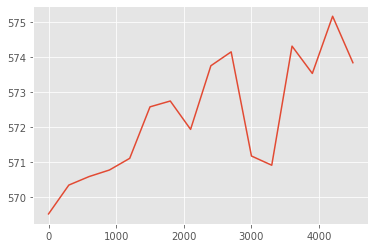

In [27]:
result = plot_seq_ave(running_time, every = 300)
plt.figure()
plt.plot(result[0],result[1])
plt.show()

In [32]:
Q.TABLE[(0, 0, 0, 1, 0, 3, False)]

{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}

In [43]:
import pandas as pd
df = pd.DataFrame.from_dict(Q.TABLE, orient='index')
df.head(10)

0    1    2    3    4    5    6    7    8    9
0 0 0 0 0 0 True   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
            False  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
          1 True   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
            False  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
          2 True   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
            False  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
          3 True   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
            False  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
        1 0 True   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
            False  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [3]:
Q.TABLE_df.loc[(0, 0, 0, 1, 0, 3, False)].idxmax()

0

In [4]:
Q.TABLE_df.loc[(0, 0, 0, 1, 0, 3, False)]

0

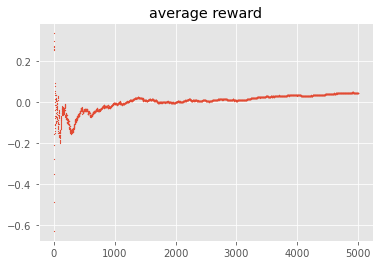

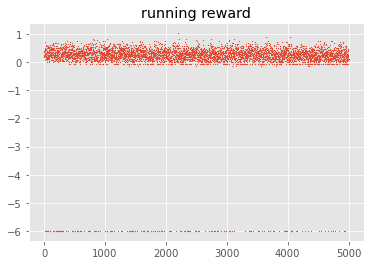

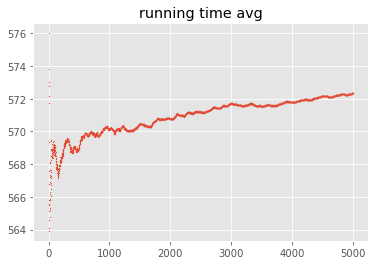

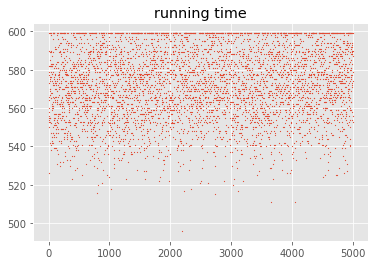

In [28]:
plt.style.use('ggplot')
fig1 = plt.figure()
plt.scatter(range(MAX_EPISODES), runningAverage(running_reward), label = 'avg reward', s=0.5)
plt.title('average reward')
plt.show()

fig2 = plt.figure()
plt.scatter(range(MAX_EPISODES), running_reward, label = 'reward', s=0.5)
plt.title('running reward')
plt.show()

fig3 = plt.figure()
plt.scatter(range(MAX_EPISODES), runningAverage(running_time), label = 'running time avg', s=0.5)
plt.title('running time avg')
plt.show()

fig4 = plt.figure()
plt.scatter(range(MAX_EPISODES), running_time, label = 'running time', s=0.5)
plt.title('running time')
plt.show()



#plot(runningAverage(running_reward))
#plot(running_time)
#plot(running_reward)

In [ ]:
print(list(Q.TABLE.values()))